# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Mon Jun 17 15:21:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

2.3.0+cu121
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [4]:
import torchvision
import torchvision.transforms as transforms
import torch

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [5]:
train_dataset = torchvision.datasets.MNIST(root='/', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='/', train=False, download=True, transform=transforms.ToTensor())


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4598568.31it/s]


Extracting /MNIST/raw/train-images-idx3-ubyte.gz to /MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134223.86it/s]


Extracting /MNIST/raw/train-labels-idx1-ubyte.gz to /MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1268578.45it/s]


Extracting /MNIST/raw/t10k-images-idx3-ubyte.gz to /MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11226003.99it/s]

Extracting /MNIST/raw/t10k-labels-idx1-ubyte.gz to /MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [6]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /
    Split: Train
    StandardTransform
Transform: ToTensor()

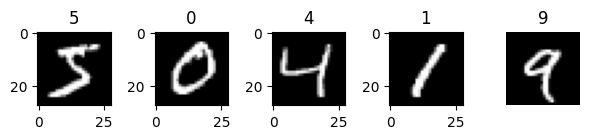

In [7]:
import matplotlib.pyplot as plt

random_index = torch.randint(low=0, high=60000, size=(5,))
f, axes = plt.subplots(1,5, figsize=(6,6))
for i in range(random_index.shape[0]):
  image = train_dataset[i][0]
  label = train_dataset[i][1]
  image = pil_image = transforms.ToPILImage()(image)
  axes[i].imshow(pil_image, cmap='gray')
  axes[i].set_title(label)
plt.axis('off')
plt.tight_layout()
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
import torch.nn as nn

class TinyVGG(nn.Module):
    def __init__(self, num_classes=10):
        super(TinyVGG, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.fc1 = nn.Linear(128 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.pool(self.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
import numpy as np
def train(model, opt, loss_fn, epochs, history, device, tr_loader, test_loader):
    for epoch in range(epochs):
        print('----- Epoch %d/%d -----' % (epoch+1, epochs))
        avg_loss_tr = 0
        model.train()
        for X_batch, Y_batch in tr_loader:
            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)
            opt.zero_grad()
            Y_pred = model(X_batch)
            loss = loss_fn(Y_pred, Y_batch)
            loss.backward()
            opt.step()
            avg_loss_tr += loss / len(tr_loader)
        #del X_batch, Y_batch, Y_pred_0, Y_pred_1, Y_pred_2, Y_pred_3
        #gc.collect()
        history['train loss'].append(avg_loss_tr.detach().cpu().numpy())
        print('train loss: %f \n' % avg_loss_tr, end='  ')
        torch.cuda.empty_cache()
        model.eval()
        with torch.no_grad():
            avg_loss_val = 0
            for X_batch, Y_batch in test_loader:
                X_batch = X_batch.to(device)
                Y_batch = Y_batch.to(device)
                Y_pred = model(X_batch)
                loss_val = loss_fn(Y_pred, Y_batch)
                avg_loss_val += loss_val / len(test_loader)
            #del X_batch, Y_batch, Y_pred_0, Y_pred_1, Y_pred_2, Y_pred_3
            #gc.collect()
        history['val loss'].append(avg_loss_val.detach().cpu().numpy())
        print('val loss: %f \n' % avg_loss_val)
        weights_filename = f'resnet_50_weights_p1_epoch{epoch+1}.pth'
        torch.save(model.state_dict(), weights_filename)
        #print("--- %i seconds ---" % (time.time() - start_time))


In [11]:
TinyVGG_mnist_cpu = TinyVGG()
TinyVGG_mnist_gpu = TinyVGG()

In [15]:
  #device_cpu = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
%%time
device_gpu = torch.device('cuda')
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(TinyVGG_mnist_gpu.parameters(), lr=3e-5)
TinyVGG_mnist_gpu.to(device_gpu)
max_epochs = 5
history = {'train loss':[], 'val loss':[]}
train(TinyVGG_mnist_gpu, optim, loss_fn, 5, history, device_gpu, train_dataloader, test_dataloader)

----- Epoch 1/5 -----
train loss: 0.426097 
  val loss: 0.100744 

----- Epoch 2/5 -----
train loss: 0.126578 
  val loss: 0.059109 

----- Epoch 3/5 -----
train loss: 0.082500 
  val loss: 0.050691 

----- Epoch 4/5 -----
train loss: 0.062250 
  val loss: 0.036592 

----- Epoch 5/5 -----
train loss: 0.049408 
  val loss: 0.034300 

CPU times: user 1min 42s, sys: 1.25 s, total: 1min 43s
Wall time: 1min 45s


In [14]:
  #device_cpu = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
%%time
device_cpu = torch.device('cpu')
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(TinyVGG_mnist_cpu.parameters(), lr=3e-5)
TinyVGG_mnist_cpu.to(device_cpu)
max_epochs = 5
history = {'train loss':[], 'val loss':[]}
train(TinyVGG_mnist_cpu, optim, loss_fn, 2, history, device_cpu, train_dataloader, test_dataloader)

----- Epoch 1/2 -----


KeyboardInterrupt: 

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

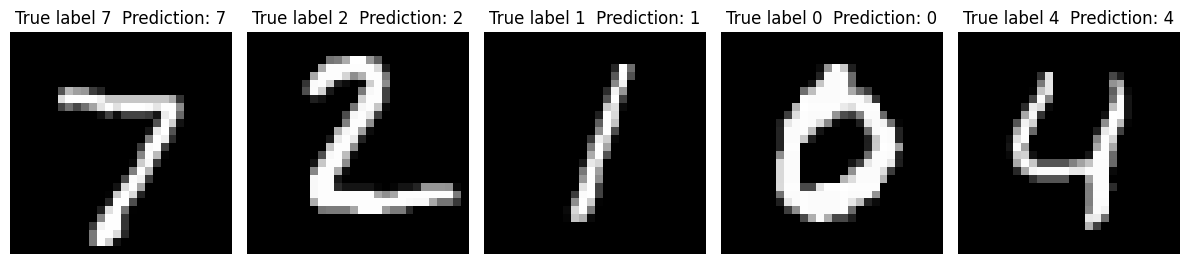

In [16]:
num_to_plot = 5
fig, axes = plt.subplots(1, num_to_plot, figsize=(12, 3))

for i, ax in enumerate(axes):
    img = test_dataset[i][0]
    label = test_dataset[i][1]

    model_pred_logits = TinyVGG_mnist_gpu(img.unsqueeze(dim=0).to(device))
    model_pred_label = torch.argmax(model_pred_logits, dim=1)
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"True label {label}  Prediction: {model_pred_label.cpu().item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [17]:
true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = TinyVGG_mnist_gpu(images)
        predictions = torch.argmax(outputs, 1)
        pred_labels.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, pred_labels)

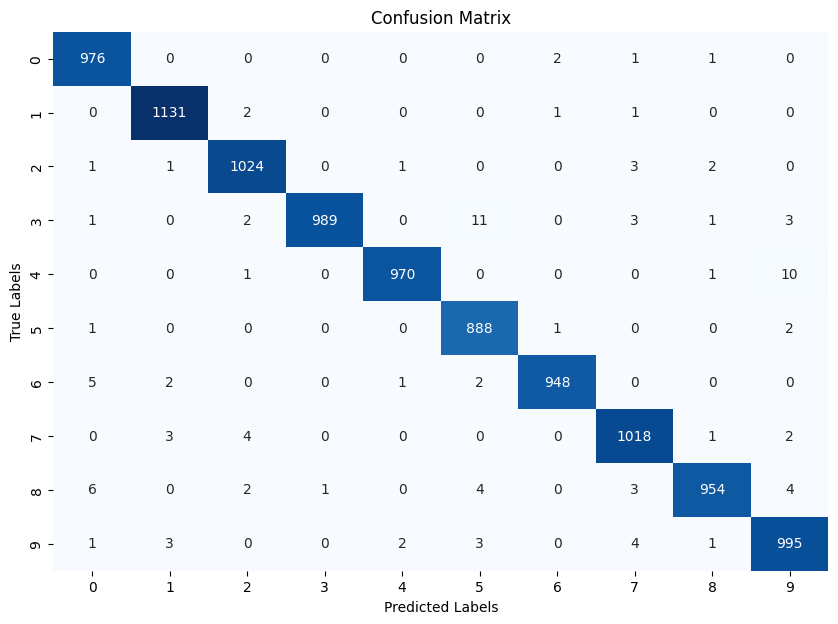

In [22]:
# Plot using seaborn for better aesthetics
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [23]:
random_tensor = torch.rand([1, 3, 64, 64])

In [24]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=8, stride=2, padding=2)

print(f"Original shape: {random_tensor.shape}")
random_after = conv_layer(random_tensor)
print(f"Afted conv2d tensor shape: {random_after.shape}")

Original shape: torch.Size([1, 3, 64, 64])
Afted conv2d tensor shape: torch.Size([1, 128, 31, 31])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [25]:
fashion_mnist_train = torchvision.datasets.FashionMNIST(root="/", download=True, train=True, transform=transforms.ToTensor())
fashion_mnist_test = torchvision.datasets.FashionMNIST(root="/", train=False, download=True, transform=transforms.ToTensor())
fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

TinyVGG_mnist_gpu_fashion = TinyVGG()
device_gpu = torch.device('cuda')
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(TinyVGG_mnist_gpu_fashion.parameters(), lr=3e-5)
TinyVGG_mnist_gpu_fashion.to(device_gpu)
max_epochs = 5
history = {'train loss':[], 'val loss':[]}
train(TinyVGG_mnist_gpu_fashion, optim, loss_fn, 5, history, device_gpu, fashion_mnist_train_dataloader, fashion_mnist_test_dataloader)


100%|██████████| 26421880/26421880 [00:03<00:00, 7628364.75it/s] 


Extracting /FashionMNIST/raw/train-images-idx3-ubyte.gz to /FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 146601.54it/s]


Extracting /FashionMNIST/raw/train-labels-idx1-ubyte.gz to /FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2742289.58it/s]


Extracting /FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6085760.14it/s]


Extracting /FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /FashionMNIST/raw

----- Epoch 1/5 -----
train loss: 0.853701 
  val loss: 0.550452 

----- Epoch 2/5 -----
train loss: 0.539563 
  val loss: 0.457296 

----- Epoch 3/5 -----
train loss: 0.464903 
  val loss: 0.401655 

----- Epoch 4/5 -----
train loss: 0.416896 
  val loss: 0.382940 

----- Epoch 5/5 -----
train loss: 0.384481 
  val loss: 0.356541 



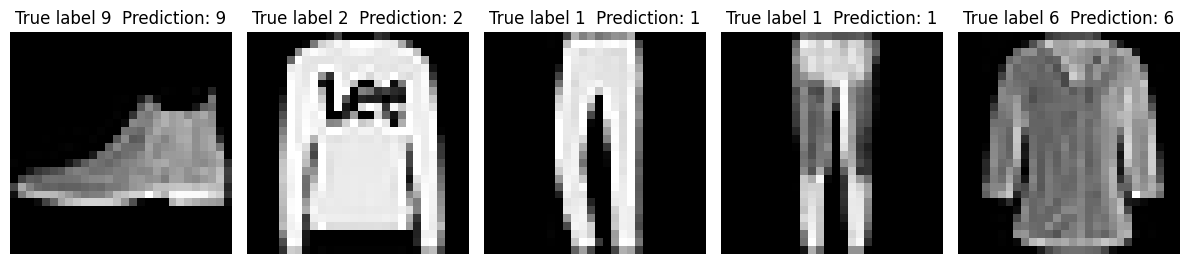

In [26]:
num_to_plot = 5
fig, axes = plt.subplots(1, num_to_plot, figsize=(12, 3))

for i, ax in enumerate(axes):
    img = fashion_mnist_test[i][0]
    label = fashion_mnist_test[i][1]

    model_pred_logits = TinyVGG_mnist_gpu_fashion(img.unsqueeze(dim=0).to(device))
    model_pred_label = torch.argmax(model_pred_logits, dim=1)
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"True label {label}  Prediction: {model_pred_label.cpu().item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()